# Online Payments Fraud Detection Machine Learning Project- Blossom Bank Plc

## Problem Definition

This Project aims to solve the challenge of accurately and precisely identifying fraudulent online payment transactions. This is a significant issue for Blossom Bank that process online payments, as fraud can result in financial losses and damage to its reputation.

## How will the business benefit from this project?

By using machine learning to develop a predictive model for identifying fraudulent transactions, Blossom Bank Plc can potentially reduce their losses from online payment fraud. This can be achieved by automatically flagging potentially fraudulent transactions in real-time, allowing the bank to take appropriate action to prevent or minimize losses. Additionally, by using machine learning to identify the factors that are most indicative of online payment fraud, Blossom Bank Plc can better understand the patterns and tactics used by fraudsters, and take steps to prevent future incidents.

Overall, the solution provided by the Online Payment Fraud Detection Machine Learning Project can help Blossom Bank Plc to reduce their exposure to online payment fraud, and protect their financial and reputational interests.




    

In [1]:
# import necessary libraries for Exploratory Data Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Load the data

data = pd.read_csv(r'C:\Users\username\Downloads\Online Payment Fraud Detection.csv')

## Exploratory Data Analysis

In [23]:
# Examine the first 10 rows

data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0


In [24]:
# Get information about the variables in the dataset
data.describe(include='all')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1048575,1.048575e+06,1048575,1.048575e+06,1.048575e+06,1048575,1.048575e+06,1.048575e+06,1.048575e+06
unique,NaN,5,NaN,1048317,NaN,NaN,449635,NaN,NaN,NaN
top,NaN,CASH_OUT,NaN,C1214450722,NaN,NaN,C985934102,NaN,NaN,NaN
freq,NaN,373641,NaN,2,NaN,NaN,98,NaN,NaN,NaN
mean,2.696617e+01,NaN,1.586670e+05,NaN,8.740095e+05,8.938089e+05,NaN,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,NaN,2.649409e+05,NaN,2.971751e+06,3.008271e+06,NaN,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,NaN,1.000000e-01,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,NaN,1.214907e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,NaN,7.634333e+04,NaN,1.600200e+04,0.000000e+00,NaN,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,NaN,2.137619e+05,NaN,1.366420e+05,1.746000e+05,NaN,9.159235e+05,1.149808e+06,0.000000e+00


In [9]:
# Get more information on the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


The result above indicates no null values in our dataset. It also shows we have a total of 1,048,575 rows and 10 columns.

In [25]:
# Check number unique items in the 'type' column

col_type = data['type'].value_counts().to_frame()
col_type

,type
CASH_OUT,373641
PAYMENT,353873
CASH_IN,227130
TRANSFER,86753
DEBIT,7178


In [26]:
# Check number unique items in the 'type' column

col_isFraud = data['isFraud'].value_counts().to_frame()
col_isFraud

,isFraud
0,1047433
1,1142


The above indicates that the dataset has a very large proportion of non-fraud transactions, which is highly expected. This is a clear case of class imbalance and could likely affect our machine learning

In [27]:
# Change the values in the 'isFraud' columns to "Fraud" & "No Fraud"

data['isFraud'] = data['isFraud'].map(lambda x: 'Fraud' if x==1 else 'NoFraud')

data['isFraud']


0          NoFraud
1          NoFraud
2            Fraud
3            Fraud
4          NoFraud
            ...   
1048570    NoFraud
1048571    NoFraud
1048572    NoFraud
1048573    NoFraud
1048574    NoFraud
Name: isFraud, Length: 1048575, dtype: object

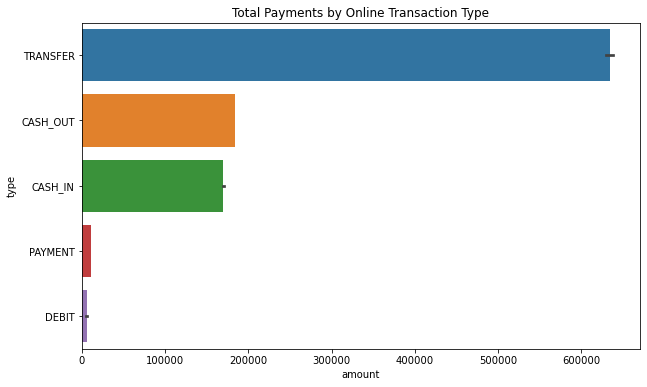

In [28]:
# Examine the total payments by Online Transaction Type
orderd_color = ['TRANSFER','CASH_OUT','CASH_IN','PAYMENT','DEBIT']

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data= data, y='type',x='amount', order=orderd_color).set(title='Total Payments by Online Transaction Type')
plt.show()

The plot above indicates that transfer, cash-out and cash-in processed the most amount of online payments

Text(0, 0.5, 'count of online transaction type ')

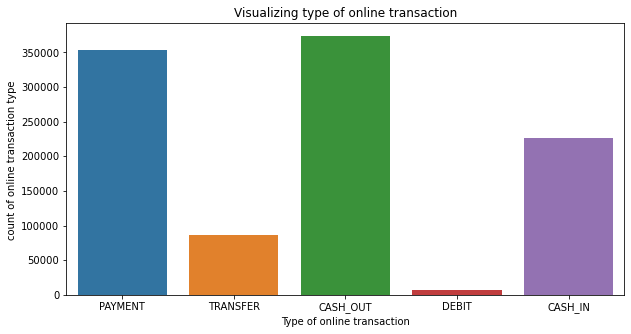

In [29]:
#visualize type of online transaction
plt.figure(figsize=(10,5))
sns.countplot (x="type", data= data)
plt.title ("Visualizing type of online transaction")
plt.xlabel("Type of online transaction")
plt.ylabel("count of online transaction type ")

Cash_Out, Payment and Cash_in appears to be the most frequently used medium of online transactions

In [30]:
# Total Number of Frauds Committed
pmt_fraud = data.isFraud[data['isFraud']=='Fraud'].count()
print (f'Total Number of Frauds Committed is {pmt_fraud}')

Total Number of Frauds Committed is 1142


In [31]:
# Ascertain the payment type of frauds committed and the number of fraud by online payment type

# Value of Frauds Committed
fraud_total = data[data['isFraud']=='Fraud'].groupby(['type'])['amount'].sum().round(decimals=-1).to_frame()
fraud_total['amount'] = fraud_total['amount']/1000
fraud_total.rename(columns={'amount':'amount_in_thousands'},inplace=True)

# Fraud Count
fraud_count =data[data['isFraud']=='Fraud'].groupby(['type'])['isFraud'].count().to_frame()
fraud_count.rename(columns={'isFraud':'fraud_count'}, inplace=True)


#Merge both tables above
frauds = pd.merge(fraud_count,fraud_total,on='type')
frauds['avg_fraud'] = (frauds['amount_in_thousands']/frauds['fraud_count']).round(decimals=2)


frauds


,fraud_count,amount_in_thousands,avg_fraud
type,,,
CASH_OUT,578,680383.86,1177.13
TRANSFER,564,681598.38,1208.51


The fraud cases were between CASH_OUT and TRANSFER payment methods. This indicates that despite transfers being less frequently used than Cash_out, it has the most value of transactions and frauds

In [37]:
# Fraud Dataset: Create a dataset for all fraud cases

fraud_data = data[data['isFraud']=='Fraud']
fraud_data


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,Fraud
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,Fraud
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,Fraud
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,Fraud
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,Fraud
...,...,...,...,...,...,...,...,...,...,...
1047888,95,CASH_OUT,56745.14,C526144262,56745.14,0.0,C79051264,51433.88,108179.02,Fraud
1048221,95,TRANSFER,33676.59,C732111322,33676.59,0.0,C1140210295,0.00,0.00,Fraud
1048222,95,CASH_OUT,33676.59,C1000086512,33676.59,0.0,C1759363094,0.00,33676.59,Fraud
1048323,95,TRANSFER,87999.25,C927181710,87999.25,0.0,C757947873,0.00,0.00,Fraud


In [38]:
# Largest Fraud Amount

largest_fraud = fraud_data.amount.max()
print (f'The largest fraudulent payment is {largest_fraud}')
print()

# Displays row with the largest fraud amount
fraud_data.sort_values(by='amount',ascending=False).head(1)

The largest fraudulent payment is 10000000.0



,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1030661,82,TRANSFER,10000000.0,C1237313447,11000000.0,987591.59,C1468356154,0.0,0.0,Fraud


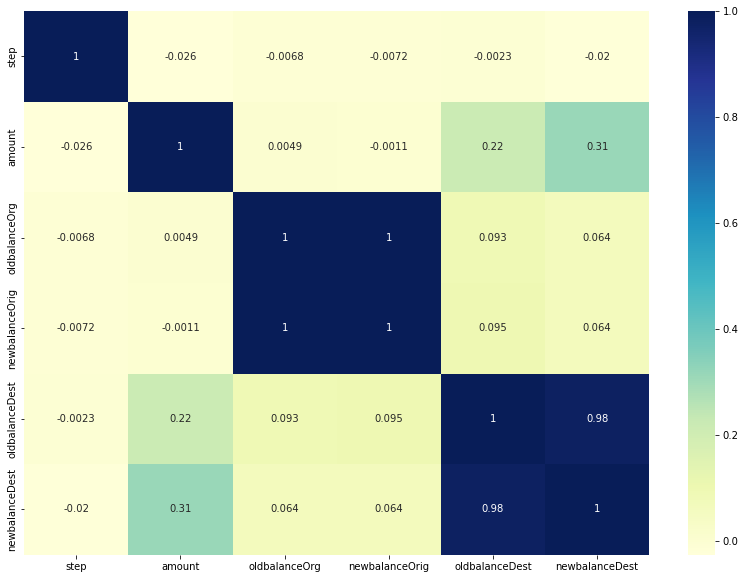

In [39]:
# Correlation heatmap showing relationships between the variables in the fraud data

fig, ax = plt.subplots(figsize=(14,10))
fraud_data = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

The above heatmap shows correlation that exists in the fraud values in the dataset. It indicates little or no meaninful 
correlation between the variables in the dataset

## Encoding Categorical Variables
Our data contains some categorical variables which will be unreadable by our machine learning model, hence we need to transform 
these variables into numerical values. 

We will be using one-hot encoding to encode these variables and drop one of the class columns for our categorical variables to
avoid multicolinearity in our dataset

In [40]:
# Data before encoding & removing
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,NoFraud
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,NoFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,Fraud
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,Fraud
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,NoFraud


In [41]:
# Data After Encoding the 'type' column using pandas get_dummies function. 
# Note the use of the parameter drop_first used to drop the first column of our result.
# We will be encoding only column 'type' as it is the only categorical column in the dataset that could assist our model.


Data_Dum = pd.get_dummies(data, columns=['type'],drop_first = True)
Data_Dum

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,NoFraud,0,0,1,0
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,NoFraud,0,0,1,0
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,Fraud,0,0,0,1
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,Fraud,1,0,0,0
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,NoFraud,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,NoFraud,1,0,0,0
1048571,95,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,NoFraud,0,0,1,0
1048572,95,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,NoFraud,0,0,1,0
1048573,95,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,NoFraud,0,0,1,0


In [42]:
# Rwmove unnecessay columns from dataset

Data_Dum.drop(columns=['step','nameOrig','nameDest'],inplace=True)
Data_Dum.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.0,160296.36,0.0,0.0,NoFraud,0,0,1,0
1,1864.28,21249.0,19384.72,0.0,0.0,NoFraud,0,0,1,0
2,181.00,181.0,0.00,0.0,0.0,Fraud,0,0,0,1
3,181.00,181.0,0.00,21182.0,0.0,Fraud,1,0,0,0
4,11668.14,41554.0,29885.86,0.0,0.0,NoFraud,0,0,1,0


In [44]:
# Class Count- we use this to count the number of records in the isFraud column according to Fraud and No-fraud.

print ('The value caounts for the "isFraud" columns is')
print (Data_Dum.isFraud.value_counts())
print ()
       
print ('This shows a huge class imbalance which will affect our model.\nOur model will learn more of the "Fraud" class.\nWe will need to balance the classes before testing our machine\nlearning models')



The value caounts for the "isFraud" columns is
NoFraud    1047433
Fraud         1142
Name: isFraud, dtype: int64

This shows a huge class imbalance which will affect our model.
Our model will learn more of the "Fraud" class.
We will need to balance the classes before testing our machine
learning models


## Model selection, training, and validation

We will be using two supervised Machine Learning Models (Random Forest Classifier and K-Nearest Neighbors Classifier).

Both models will be evaluated based on their classification report.

We will also resample our training dataset to deal with the imbalance. 

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE #to be used to balance the dataset

# Load the imbalanced dataset
X = Data_Dum.drop('isFraud',axis='columns')
y = Data_Dum.isFraud

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
# Note the use of the stratify argument. This ensures that we have an equal split of the classes in our training and test sets
# I have also used a slightly higher test_size because I would like to oversample the minority class in the training dataset

# Oversample the minority class using SMOTE
smote = SMOTE(random_state=42,sampling_strategy='not majority')
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)




In [48]:
# Initialize the models
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()

# Train the models
rfc.fit(X_train_smote, y_train_smote)
knn.fit(X_train_smote, y_train_smote)

# Test the models
y_pred_rfc = rfc.predict(X_test)
y_pred_knn = knn.predict(X_test)


In [49]:

# Print the accuracy scores and classification reports for each model
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rfc))
print(classification_report(y_test, y_pred_rfc))
print(confusion_matrix(y_test, y_pred_rfc))
print()
print()

print("K-Nearest Neighbors Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print()


Random Forest Results:
Accuracy: 0.9980497341630308
              precision    recall  f1-score   support

       Fraud       0.34      0.87      0.49       457
     NoFraud       1.00      1.00      1.00    418973

    accuracy                           1.00    419430
   macro avg       0.67      0.93      0.75    419430
weighted avg       1.00      1.00      1.00    419430

[[   397     60]
 [   758 418215]]


K-Nearest Neighbors Results:
Accuracy: 0.9909639272345803
              precision    recall  f1-score   support

       Fraud       0.09      0.82      0.17       457
     NoFraud       1.00      0.99      1.00    418973

    accuracy                           0.99    419430
   macro avg       0.55      0.91      0.58    419430
weighted avg       1.00      0.99      0.99    419430

[[   376     81]
 [  3709 415264]]



## Model Evaluation

Both models has a very good accuracy score. Since the aim of our model is to detect frauds, we will be selecting a model that
has the highest precision, recall and f1 score. Random Forest produced the best results.

Also the confusion matrix indicates the following values

1.Random Forest
 * True Positives- 418,215
 * True Negatives-     397     
 * False Positives-    758 
 * False Negatives-     60
 
 
2.K- Nearest Neighbours
 * True Positives- 415,264   
 * True Negatives-     376
 * False Positives-  3,709
 * False Negatives-     81
 
Random Forest produced lesser False Positives of 758.
 
The False positives are more important to the Blossom Bank Plc. False Positives in this case means our model predicts No-fraud cases when actually there are Fraud cases. 

This would lead to losses and damages to the bank if the model keeps passing fraudulent transactions as genuine transactions for an extended period of time. It may also damage the Blossom Bank Plc's reputation as customers may lose trust in the ability of the bank to safeguard their data and finances.   


Hence, we will be selecting a model that minimizes the False Positive Cases.



